# 분류(Classification)
주로 앙상블을 다룸, 딥러닝에 비해 정형데이터에서는 강하다.

# 결정트리(Decision Tree)

트리 기반으로 결정 규칙을 만들어 내는것, 
depth에 따라 성능이 좌우됨, 여기선 가능한 적은 노드로 정확도를 높이는 것이 좋다.  
information gain, gene 계수들을 사용하여 분류 조건을 만듬.
  
- 장점  
    직관적임  
- 단점  
    overfitting에 약하다.

| parameter name | usage |  
|:---------------|-------|  
|min_samples_split|노드 분할을 위한 최소의 샘플 데이터수 overfitting 방지|
|min_samples_leaf|말단 노드가 되기위한 최소한의 샘플 데이터 수 overfitting 방지|  
|max_features|고려할 피쳐 개수 default==None, (int,float,sqrt,auto,log,None이 있음)|
|max_depth|트리의 최대 깊이 지정, 너무 크면 overfitting|

confusion metrics
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy:  1.0



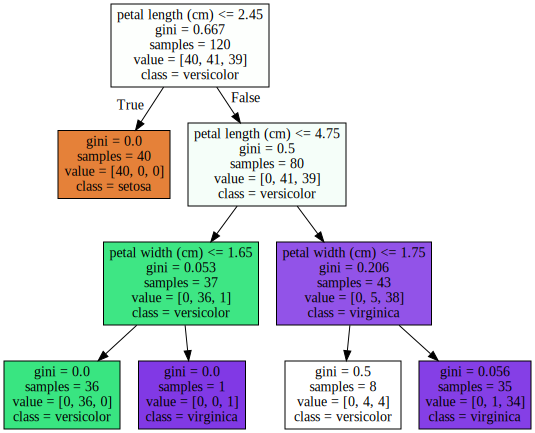

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd

from sklearn.tree import export_graphviz
import graphviz

import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)

iris = load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target, test_size=0.2,random_state=42)

dt_clf.fit(x_train,y_train)


print('confusion metrics')
print(confusion_matrix(y_test,dt_clf.predict(x_test)))
print('accuracy: ',accuracy_score(y_test,dt_clf.predict(x_test)))
print()

# 현재 트리를 그래프비즈로 추출
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)

#!dot -c
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



feature 중요도 plot

Feature importances:
[0.    0.    0.935 0.065]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.935
petal width (cm) : 0.065


<AxesSubplot:>

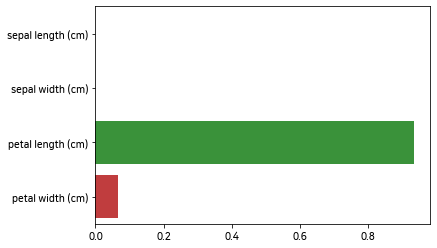

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris.feature_names,dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

# 결정트리 과적합(Overfitting)

overfitting 관찰을 위한 데이터셋 생성, 시각화

In [16]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

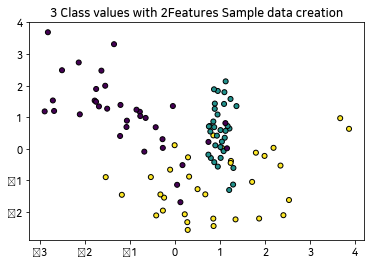

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2Features Sample data creation')

x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(x_features[:,0], x_features[:,1], marker='o', c= y_labels,s=25, edgecolor='k')

현재 이상치에 반응하는 overfitting 확인 가능

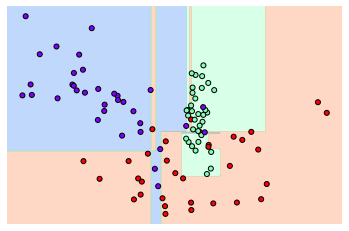

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf,x_features,y_labels)

min_samples_leaf를 6으로 설정함으로 좀 더 normalize 된 모델을 확인할 수 있다.

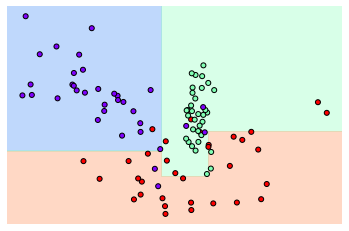

In [18]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf,x_features,y_labels)